# Zadanie 3
## Bryły Steinmetza

W tym zadaniu będziemy chcieli symulacyjnie wyznaczyć stosunek pola powierzchni do objętości 2- i 3- Bryły Steinmetza. W tym celu wykorzystamy uogólnioną metodę Monte Carlo do szacowania całek funkcji d-zmiennych postaci:
$$\idotsint_D f(x_1,\dots,x_n) \,dx_1 \dots dx_n,$$
gdzie $f:\mathbb{R}^n  \rightarrow  \mathbb{R}$, a $ D \subset \mathbb{R}^n$ jest zbiorem ograniczonym.

Do przetestowania poprawności metody oraz szybkości zbieżności algorytmu wykorzystamy całkę:

$$\idotsint_D x_1+x_2+\dots+x_n dx_1dx_2\dots dx_n, $$

gdzie $D = [0,1]^n$

Obliczmy tą całkę analitycznie, aby móc sprawdzić jaki błąd otrzymujemy podczas symulacji:

$$\idotsint_D x_1+x_2+\dots+x_n dx_1dx_2\dots dx_n = \idotsint_D x_1 dx_1dx_2\dots dx_n + \dots + \idotsint_D x_n dx_1dx_2\dots dx_n \stackrel{(*)}= n* \frac{1}{2} = \frac{n}{2}, $$

gdzie 
$$(*) = \idotsint_0^1 x_n dx_1dx_2\dots dx_n = \int_0^1x_ndx_n = \frac{x^2}{2}\Big|_0^1 = \frac{1}{2} $$

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [4]:
def policz(d,t = 10000):
    count = 0
    for _ in range(t):
        wylosowaneLiczby = [random.random() for _ in range(d)]
        y = random.uniform(0,d)
        if y <= sum(wylosowaneLiczby):
            count += 1
    return d*count/t

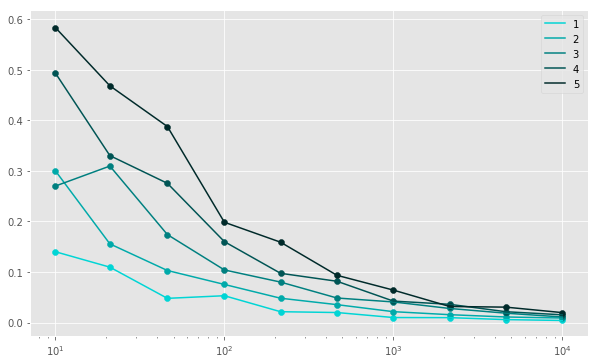

In [6]:
ts = list(map(int,(np.logspace(1,4,10))))

plt.figure(figsize = (10,6))
maxd = 6

for d in range(1,maxd):
    score = []
    for t in ts:
        temp = []
        for _ in range(30):
            temp.append(abs(policz(d,t) - d*0.5))
        score.append(np.mean(temp))
    plt.plot(ts,score,label = str(d), color = (0,1 - d/maxd,1 - d/maxd))
    plt.scatter(ts,score, color = (0,1 - d/maxd,1 - d/maxd))

plt.xscale('log')
plt.legend(loc = 'best')
plt.show()

Na podstawie wykresu można przypuszczać, że wraz ze wzorstem wymiaru $d$ całka (wpisać) zbiega coraz wolniej.

# Zadanie 4
## Rozkłady $\alpha$-stabilne

Wstęp teoretyczne

Rozkłady stabline powstają z sumowania zmiennych iid 
Jest to podobne do CTG, ale nie mamy założenia o $EX^2 < \infty $
Ponad rozkłady stabline mamy rozkłady nieskończenie podzielne, które nie mają założenia o iid

W związku z tym istnieje duże zapotrzebowanie na generowanie liczb z tego rozkładu



W tym zadaniu zajmiemy się generowaniem rozkładów 
$\alpha$-stabilnych $S(\alpha,\beta,\mu,\sigma)$, 

gdzie $\alpha \in (0,2]$ - parametr stabliności, $\beta \in [-1,1]$ - parametr skośności, $\mu \in \mathbb{R}$ - parametr lokalizacji, $\sigma >0 $ - parametr skali.

Poniżej implementujemy algorytm generowania takich rozkładów zgodnie z pseudokodem zaproponowanym przez prof. R. Werona.
http://prac.im.pwr.edu.pl/~hugo/publ/SFB2005-008_Borak_Haerdle_Weron.pdf

In [22]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [23]:
def alfaStabilny(alfa, beta, mu, sigma):
    """Funkcja generująca liczby z rozkładu alfa-stabilnego. """
    U = random.uniform(-math.pi/2, math.pi/2)
    E = random.expovariate(1)
    if alfa != 1:
        S = (1+(beta**2)*(math.tan(math.pi*alfa/2))**2)**(1/(2*alfa))
        B = math.atan(beta*math.tan(math.pi*alfa/2))/alfa
        A = (S*math.sin(alfa*(U+B)))/((math.cos(U))**(1/alfa))
        C = (math.cos(U-alfa*(U+B))/E)**((1-alfa)/alfa)
        X = A*C
        return sigma*X + mu
    else:
        A = (math.pi/2 + beta * U)*math.tan(U)
        L = ((math.pi/2) * E * math.cos(U))/((math.pi/2) + beta*U)
        B = beta*math.log(L)
        X = (2/math.pi)*(A - B)
        return sigma*X + (2/math.pi) * beta * sigma * math.log(sigma) + mu

In [24]:
def cummulativeDistribution(data, x):
    """ Counts value of empirical cummulative distribution of x. """
    return sum([1 for element in data if element < x])/len(data)

def plotECDF(data):
    dataToPlot = []
    n = len(data)
    zakres = np.linspace(1.1*min(data), 1.1*max(data), n)
    for i in zakres:
        temp = cummulativeDistribution(data, i)
        dataToPlot.append(temp)
    
    plt.scatter(zakres[1:-1], dataToPlot[:-2], s = 10, facecolors='none', edgecolors='k')
    # Wycinki wynikają z przesunięcia punktów oraz braku otwartego kółka na końcu.
    for i in range(len(dataToPlot) - 1):
        x = [zakres[i], zakres[i+1]]
        y = [dataToPlot[i], dataToPlot[i]]
        plt.plot(x,y, color = 'k')
    plt.plot(zakres[-1], dataToPlot[-1])

In [39]:
def analysisStableData(alfa, t = 1000):
    data = [alfaStabilny(alfa, 0, 0, 1) for _ in range(t)]
    
    plt.figure(figsize = (16,6))
    
    plt.subplot(1,2,1)
    plt.title('ECDF of $S({},0,0,1)$'.format(alfa))
    plotECDF(data)
    
    plt.subplot(1,2,2)
    plt.hist(data, density = True)
    plt.show()

Następnie wyznaczamy dystrybuanty teoretyczne oraz histogramy dla rozkładów postaci $S(\alpha,0,0,1),$ gdzie $\alpha \in \{\frac{1}{2},1, \frac{3}{2}, 2\}$

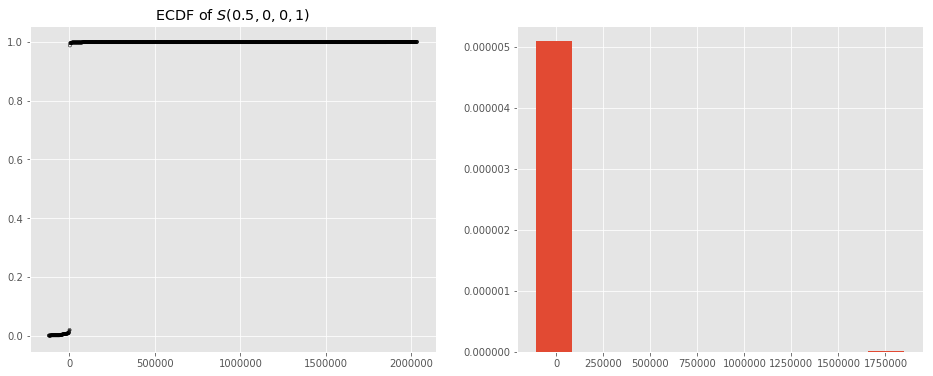

In [35]:
analysisStableData(1/2)

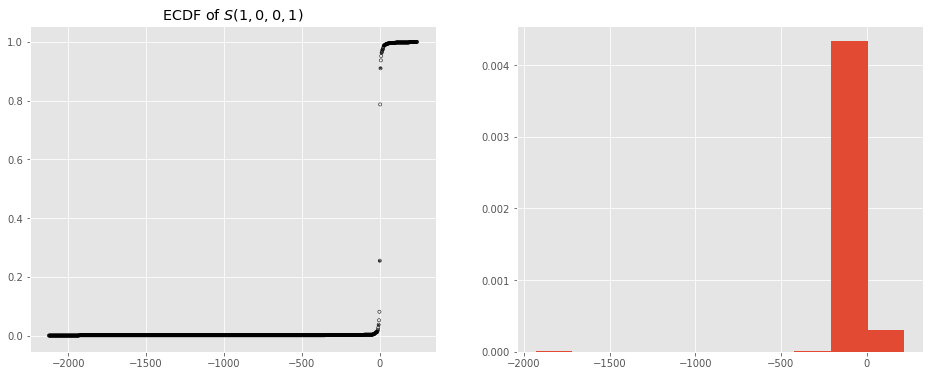

In [36]:
analysisStableData(1)

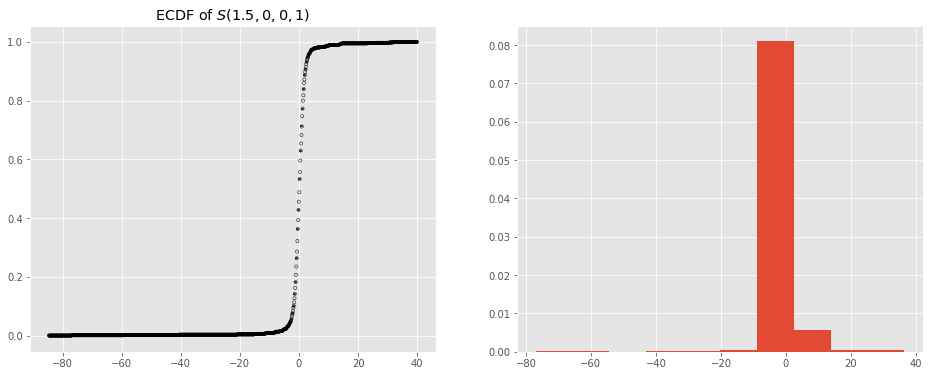

In [37]:
analysisStableData(3/2)

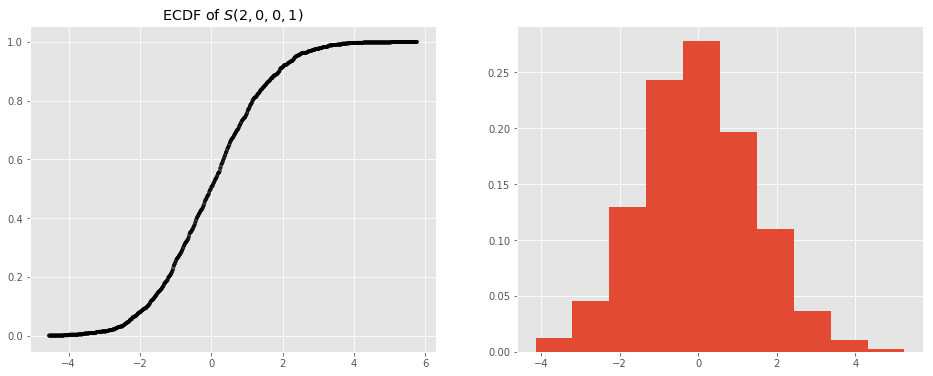

In [38]:
analysisStableData(2)

Wiemy także, że dla parametrów $\alpha = 2, \beta = 0$ otrzymujemy rozkład normalny, natomiast dla $\alpha = 1, \beta = 0$  rozkład Cauchy'ego. Wykorzystamy test Kołomogorwa-Smirnova oraz test Omnibus na normalność do sprawdzenia czy nasz rozkład $\alpha-stabilny$ generuje dla odpowienich parametrów generuje poprawne rozkłady.

Opisać KS-Test oraz test Omnibus

### Kolomogorov-Smirnov Test

$D_n= \sup_x |F_n(x)-F(x)|$

where ''sup&nbsp;<sub>x''</sub> is the [[supremum]] of the set of distances. By the [[Glivenko–Cantelli theorem]], if the sample comes from distribution ''F''(''x''), then ''D''<sub>''n''</sub> converges to 0 [[almost surely]] in the limit when <math>n</math> goes to infinity. Kolmogorov strengthened this result, by effectively providing the rate of this convergence (see below). [[Donsker's theorem]] provides yet a stronger result.

### Omnibus Test

Wikipedia to jest jakiś dramat, a SciPy nie pomaga w dokumentacji XDDDD Chyba czas zacząć szukać innego testu XDDD

In [15]:
from scipy.stats import kstest
from scipy.stats.mstats import normaltest

In [16]:
def testujRozklad(data, rozklad):
    alfa = 0.05
    if rozklad == 'cauchy':
        score = kstest(data, rozklad)
    elif rozklad == 'norm':
        score = normaltest(data)
    else:
        raise ValueError('Nie mamy testu dla takiego rozkładu.')
    pvalue = score[1]
    return pvalue >= alfa

def testuj(args, rozklad, n = 1000, MCS = 1000):
    score = 0
    for _ in range(MCS):
        data = [alfaStabilny(*args) for _ in range(n)]
        wynikTestu = testujRozklad(data, rozklad)
        if wynikTestu:
            score += 1
    return score/MCS

In [17]:
testuj((2,0,0,1), 'norm')

0.951

In [18]:
testuj((1,0,0,1), 'cauchy')

0.955

Widzimy, że zarówno dla rozkładu normalnego, jak i rozkładu Cauchy'ego nasz generator poprawnie losuje odpowiednie rozkłady.

# Zadanie 5
## Optymalizacja metody akceptacji-odrzucenia

Wstęp teoretyczny

Ogólna metoda akceptacji odrzucenia

Kod z wykładu


Sformułowanie problemu
Szybkość wykonywania operacji oraz statystyczne przechodzenie testu

__Lemat 1.__ _Jeśli $U$ jest zmienną losową o rozkładzie $U(0,1)$, to zmienna losowa $V=U^n$ ma rozkład $B(\frac{1}{n},1)$._

__Dowód:__
Niech $U \sim U(0,1)$ oraz $V=U^n$. Chcemy pokazać, że $ V \sim B(\frac{1}{n},1)$. Przypomnijmy zatem postać gestości rozkładu $B(\alpha,\beta)$:
$$f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}} {B(\alpha,\beta)}\!,$$
gdzie $B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$.


W naszym przypadku gęstość przyjmie postać:
$$f(x) = \frac{x^{\frac{1}{n}-1}} {B(\frac{1}{n},1)},$$

Ale $B(\frac{1}{n},1) = \frac{(\frac{1}{n} - 1)!(1-1)!}{(\frac{1}{n} + 1 - 1)!} = \frac{(\frac{1}{n} - 1)!}{(\frac{1}{n})!} = \frac{(\frac{1}{n} - 1)!}{(\frac{1}{n} - 1)!\frac{1}{n}} = n $

Zatem ostatecznie nasza gęstość przyjmie postać:

$$f(x) = \frac{x^{\frac{1}{n}-1}} {n}$$

Policzmy zatem $F_V(v)$:

$$F_V(v) = P(V<v) = P(U^n<v) = P(U<\sqrt[n]{v}) = F_U(\sqrt[n]{v})$$

Stąd:

$$f_V(v) = F^{\prime}_{V}(v) = F^{\prime}_{U}(\sqrt[n]{v}) = \frac{v^{\frac{1}{n} -1}}{n}$$

Zatem $ V \sim B(\frac{1}{n},1)$.

## Problem

Celem tego zadanie jest optymalizacj metody akceptacji-odrzucenia generowania zmiennej losowej z rozkładu o gęstości zadanej wzorem $f(x) = \frac{3}{2}sin(x)cos^2(x)$. Wyjściowym algorytmem, który będziemy optymalizować jest algorytm z zadania 10, którego kod znajduje się poniżej:

In [19]:
from scipy.optimize import fmin, fminbound
from scipy.integrate import quad

def akceptacjaOdrzucenieCiagla(f, a, b, *args):
    M = f(fminbound(lambda x: -f(x, *args),a,b), *args)
    while True:
        u1 = random.uniform(a,b)
        u2 = random.uniform(0,M)
        if u2 <= f(u1, *args):
            return u1    
        
def generujAOC(f, a, b, n = 1000, *args):
    return [akceptacjaOdrzucenieCiagla(f, a, b, *args) for _ in range(n)]

def plotGestoscEmpiryczna(wyniki):
    plt.hist(wyniki, density = True)
    
def plotGestoscTeoretyczna(f, a, b, *args):
    x = np.linspace(a,b,100)
    y = [f(t, *args) for t in x]
    plt.plot(x, y)

def plotCDF(f, a, b, *args):
    zakres = np.linspace(a,b)
    wyniki = [quad(f,a,x, args = args)[0] for x in zakres]
    plt.plot(zakres,wyniki)
    
def testuj(f, a, b, *args, n = 1000):
    pierwszeWyniki = generujAOC(f, a, b, n, *args)
    
    plt.figure(figsize = (14,6))
    
    plt.subplot(1,2,1)
    plotGestoscEmpiryczna(pierwszeWyniki)
    plotGestoscTeoretyczna(f, a, b, *args)
    plt.title('Density')
    
    plt.subplot(1,2,2)
    plotECDF(pierwszeWyniki)
    plotCDF(f, a, b, *args)
    plt.title('ECDF vs. CDF')
    plt.show()
    
    print('Mean = ',np.mean(pierwszeWyniki))
    print('Std = ',np.std(pierwszeWyniki))

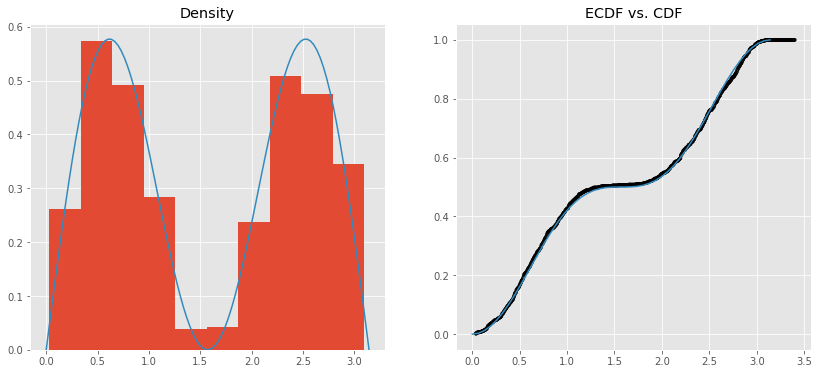

Mean =  1.56004131221
Std =  0.966040948206


In [20]:
def f(x):
    return 3*np.sin(x)*(np.cos(x))**2/2
a = 0
b = np.pi
testuj(f,a,b)

Zmierzmy czas generowania $10^4$ zmiennych losowych z tego rozkładu:

In [21]:
import time

start = time.time()
data = generujAOC(f, a, b, 10**4)
print(time.time() - start)

2.5781476497650146


Pierwszym pomysłem na optymalizację jest wpisanie ustalonego $M = \sup\limits_{x}\frac{f(x)}{g(x)}$

Wylicz to Patryk!

In [22]:
def optymalnyAO():
    M = 1/math.sqrt(3)
    while True:
        u1 = random.uniform(0,math.pi)
        u2 = random.uniform(0,M)
        if u2 <= f(u1):
            return u1 

In [23]:
def generujProbke(n = 10**4):
    return [optymalnyAO() for _ in range(n)]

Sprawdzamy czas działania algorytmu:

In [24]:
start = time.time()
data = generujProbke(10**4)
print(time.time() - start)

0.06400394439697266


Widzimy znaczną poprawę szybkości działania.

Następnym krokiem optymalzacyjnym będzie skorzystanie z szybkich operacji na tablicach z biblioteki _numpy_ .

In [25]:
def opt(n = 1000):
    M = math.ceil(math.sqrt(3))
    losoweU1 = np.pi*np.random.rand(M*n)
    losoweU2 = np.random.rand(M*n)/M
    data = losoweU1[losoweU2 <= f(losoweU1)]
    length = len(data)
    if length >= n:
        return data[:n]
    else:
        toAppend = []
        print('Zabrakło')
        for _ in range(length - n):
            toAppend.append(optymalnyAO())
        return list(data).extend(toAppend)

Sprawdzamy czas działania algorytmu:

In [26]:
start = time.time()
data = opt(10**6)
print(time.time() - start)

0.27301549911499023


Widzimy poprawę o rząd wielkości. Przeprowadźmy jeszcze symulację Monte Carlo czasów wykonania, aby wyznaczyć średni czas działania algorytmu.

In [27]:
czasy = []
for _ in range(100):
    start = time.time()
    opt(10**6)
    czasy.append(time.time() - start)
print(np.mean(czasy))

0.187700736523


Dopisać jeszcze metodę z Gaussem

In [40]:
def f(x):
    return (3*np.cos(x)*(np.sin(x))**2)/2

def generujProbke2():
    c = 1.04582
    mu = 2*math.atan(math.sqrt(2-math.sqrt(3)))
    while True:
        y = random.gauss(mu,1/4)
        u = random.random()
        if u <= f(y)/(c*norm.pdf(y, loc = mu, scale = 1/4)):
            return np.sign(random.random() - 0.5)*y + math.pi/2

Przeprowadźmy jeszcze testy, czy wygenerowane próbki faktycznie pochodzą z pożądanego rozkładu. 
W tym celu wyznaczymy gęstość teoretyczną oraz empiryczną, wykorzysamy QQPlot oraz wykorzystamy test dwustronny Kołomogorowa-Smirnova dla którego hipotezą zerową jest to, że dwie próbki pochodzą z tego samego ciągłego rozkładu prawdopodobieństwa.

Tutaj jeszcze lekko dopisać czym się różni KS-Test od dwustronnego KS-Testu

In [28]:
from scipy.stats import ks_2samp

In [29]:
def qqplot(data1, data2):
    x = list(range(1,99))
    percentile1 = np.percentile(data1,x)
    percentile2 = np.percentile(data2,x)
    plt.title("QQPlot")
    plt.plot(percentile1,percentile2)
    plt.plot([min(data1), max(data1)], [min(data2),max(data2)], '--', alpha = 0.5)

In [36]:
def testKS2samp(t = 100):
    good = 0
    alfa = 0.05
    for _ in range(t):
        data = opt(10**3)
        dataTeoretical = generujProbke(n = 10**3)
        p_value = ks_2samp(data, dataTeoretical)[1]
        if p_value >= alfa:
            good += 1
    return good/t

In [31]:
def testuj(data, f, a, b): 
    plt.figure(figsize = (14,6))
    
    plt.subplot(1,2,1)
    plotGestoscEmpiryczna(data)
    plotGestoscTeoretyczna(f, a, b)
    plt.title('Density')
    
    plt.subplot(1,2,2)
    dataTeoretical = generujProbke(n = 10**6)
    qqplot(data,dataTeoretical)
    
    plt.show()

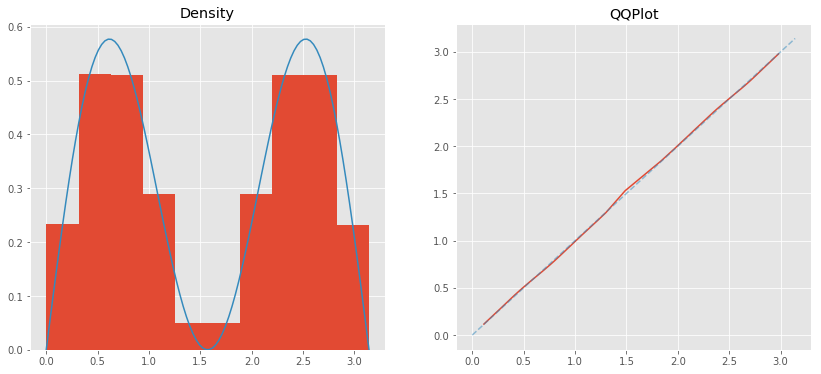

In [32]:
data = opt(10**6)

testuj(data, f, 0, math.pi)

In [37]:
testKS2samp()

0.93

Z przeprowadzonego doświadczenia wynika, że dla $\alpha=0.05$ wygenerowana próbka przechodzi test w $93\%$ przypadków, stąd możemy uznać, że nasz generator jest wystarczająco wiarygodny i naprawdę generuje liczby z rozkładu o gęstości $f(x) = \frac{3}{2}sin(x)cos^2(x)$. Należy także wziąć pod uwagę, że w tym teście próbka porównująca też jest losowo generowana i stąd mogą pochodzić pewne błędy podczas przeprowadzania testu. Wyniki testu potwierdza również wykres porównujący gęstość teoretyczną z empiryczną oraz wykres kwantylowy.